In [31]:
import pandas as pd
df = pd.read_csv(r"C:\Users\Admin\Desktop\Codes\ISRO\data_with_fwi_and_aqi.csv")

In [32]:
df.shape

(29280, 34)

In [33]:
df.head()

,Unnamed: 0.1,Unnamed: 0,valid_time,latitude,longitude,model_level,tp,number,expver,u10,...,rainfall,day,month,FWI,FFMC,DMC,DC,ISI,BUI,AQI
0,0,0,2016-01-01 00:00:00,28.43,77.34,60.0,0.0,0,1,1.428218,...,0.0,1,1,0.560175,79.281560,6.067633,16.441927,1.172131,6.311952,NaN
1,3,3,2016-01-01 00:00:00,28.43,78.09,60.0,0.0,0,1,1.158687,...,0.0,1,1,0.449313,76.429149,6.106043,17.786821,0.922358,6.571907,482.961798
2,6,6,2016-01-01 00:00:00,28.43,78.84,60.0,0.0,0,1,0.537959,...,0.0,1,1,0.440917,75.927243,6.161333,19.119587,0.888885,6.824576,460.148484
3,9,9,2016-01-01 00:00:00,28.43,79.59,60.0,0.0,0,1,-0.784673,...,0.0,1,1,0.433458,75.563421,6.211411,20.488389,0.859174,7.066780,430.052079
4,12,12,2016-01-01 00:00:00,28.43,80.34,60.0,0.0,0,1,-1.845464,...,0.0,1,1,0.423491,74.620369,6.237713,21.919768,0.826734,7.289494,359.531133


In [34]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'valid_time', 'latitude', 'longitude',
       'model_level', 'tp', 'number', 'expver', 'u10', 'v10', 'd2m', 't2m',
       'pm2p5', 'pm10', 'co', 'no2', 'go3', 'so2', 'temp_C', 'dew_C',
       'humidity', 'temp', 'wind_speed', 'rainfall', 'day', 'month', 'FWI',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'AQI'],
      dtype='object')

In [35]:
df.drop(columns=['Unnamed: 0.1','Unnamed: 0','valid_time','number','expver','model_level'],inplace=True)
df_fwi = df.drop(columns=['pm2p5','pm10', 'co', 'no2', 'go3', 'so2','temp_C','dew_C','tp','u10','v10','d2m','t2m','latitude','longitude','day','month'])

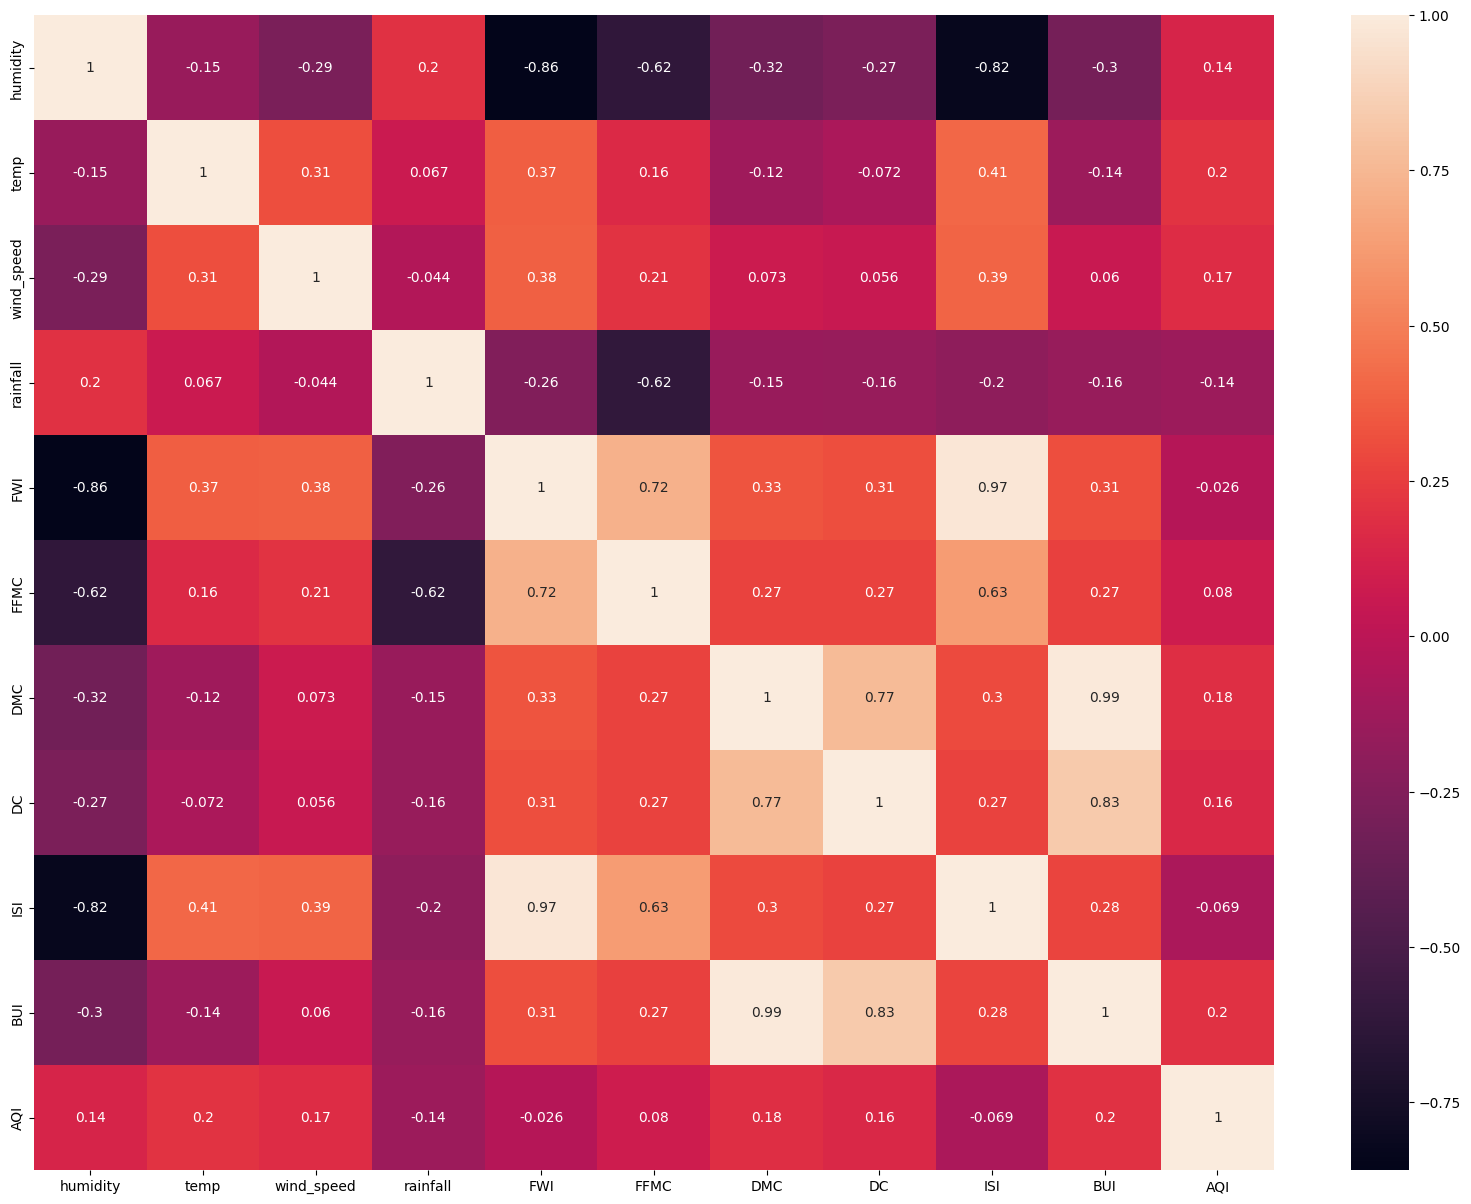

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 15))  
sns.heatmap(df_fwi.corr(numeric_only=True),annot=True)
plt.show()

In [37]:
df_fwi.drop(columns=['BUI','DMC','ISI','AQI'],inplace=True)

In [38]:
df_fwi.head()

,humidity,temp,wind_speed,rainfall,FWI,FFMC,DC
0,94.892002,9.65515,2.034808,0.0,0.560175,79.281560,16.441927
1,96.946000,9.11608,1.945745,0.0,0.449313,76.429149,17.786821
2,95.574767,9.04870,1.865755,0.0,0.440917,75.927243,19.119587
3,96.069346,9.24890,1.635804,0.0,0.433458,75.563421,20.488389
4,98.002648,9.59655,1.918766,0.0,0.423491,74.620369,21.919768


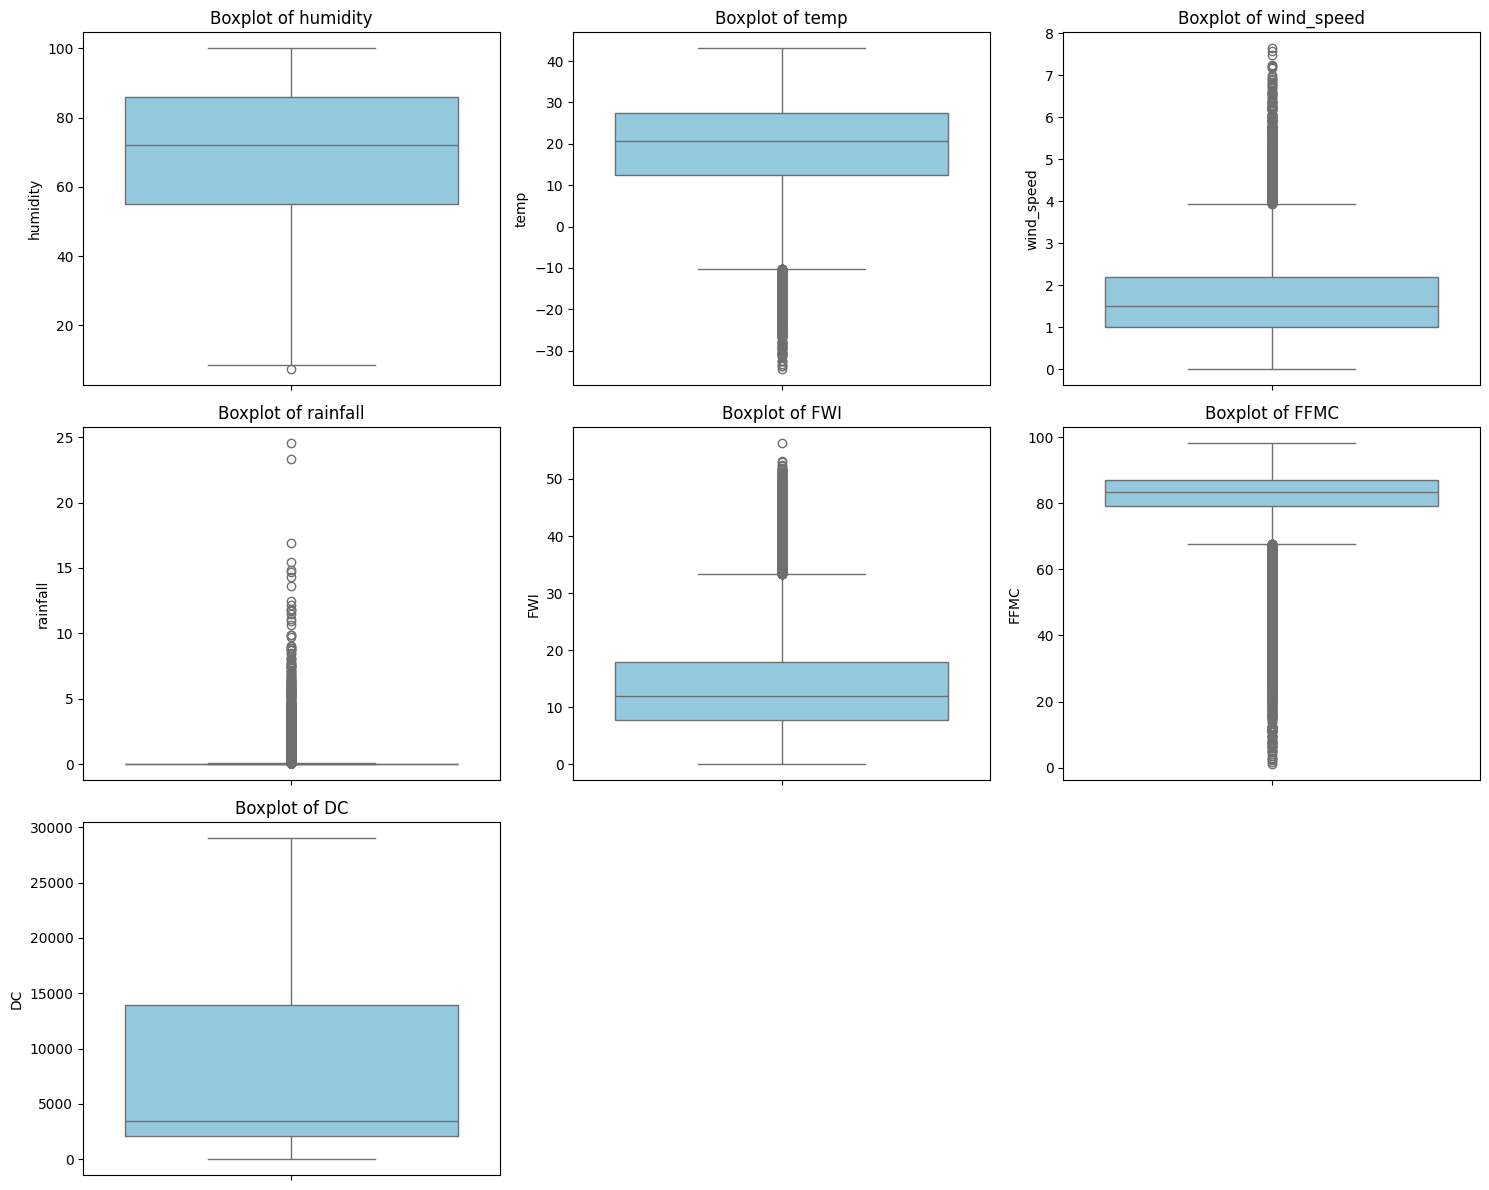

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_boxplots(df):
    cols = df.columns[:7]   
    n = len(cols)
    
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(cols):
        sns.boxplot(y=df[col], ax=axes[i], color="skyblue")
        axes[i].set_title(f"Boxplot of {col}")
    
    for j in range(i+1, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout()
    plt.show()

plot_boxplots(df_fwi)

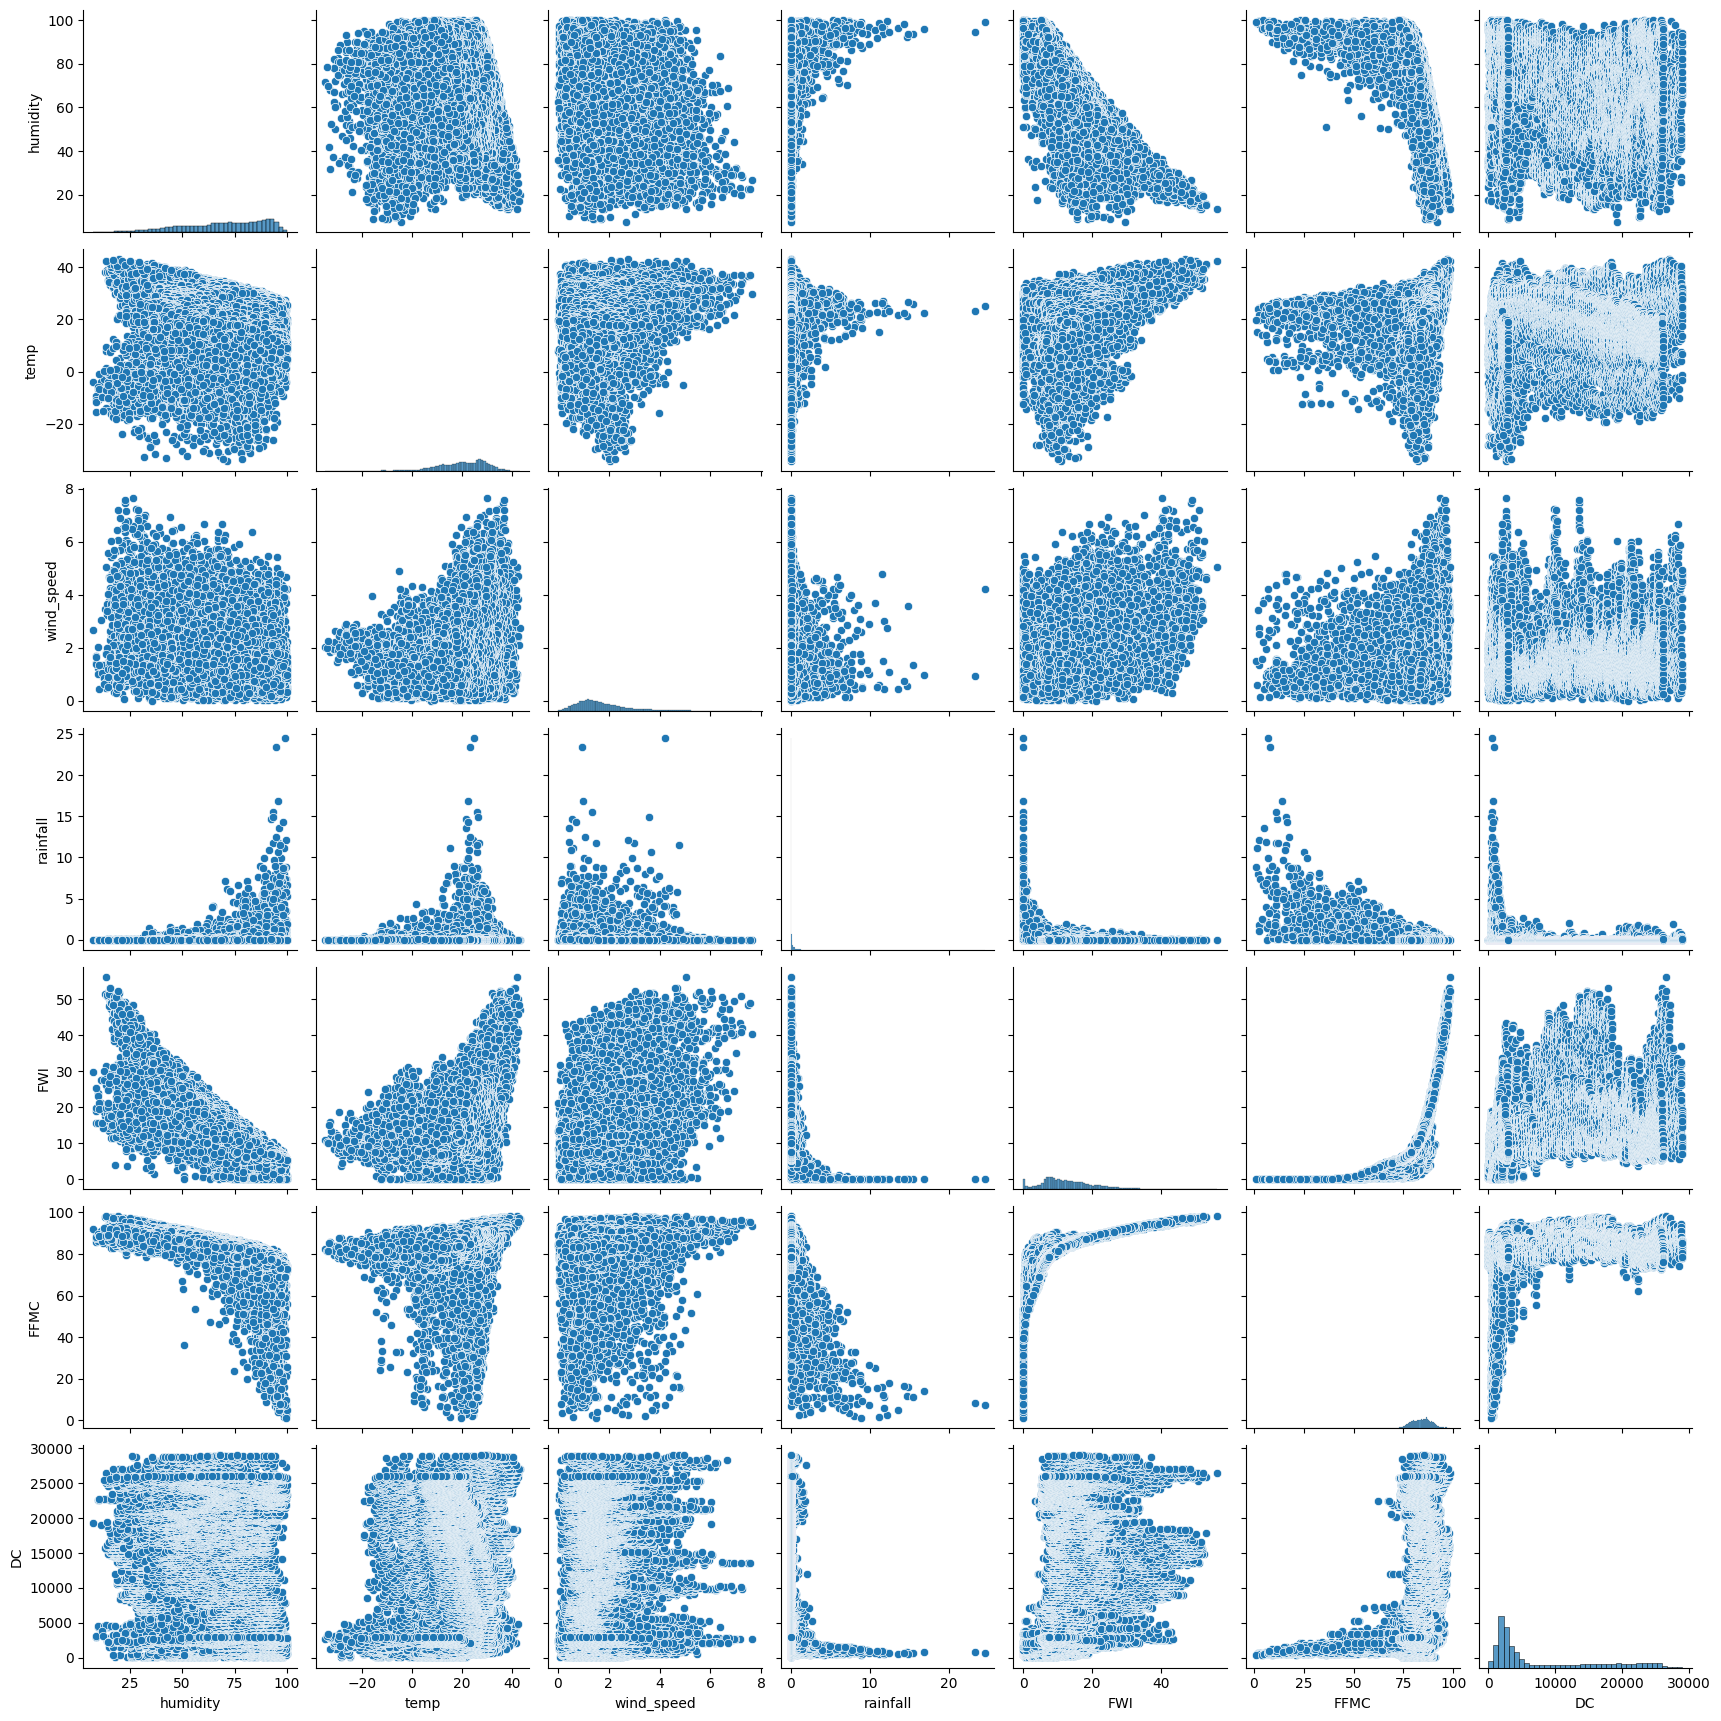

In [40]:
sns.pairplot(df_fwi)

In [41]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [42]:
X  = df_fwi.drop(columns ='FWI',axis=1)
y = df_fwi['FWI']

In [43]:
x_train , x_test , y_train , y_test = train_test_split(X,y,random_state=1,test_size=0.2)

In [44]:
sc = StandardScaler()

In [45]:
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

In [54]:
x_train_scaled[0]

array([-1.30415881,  0.37731779,  0.02325512, -0.12175249,  0.74956762,
       -0.45246074])

In [46]:
from sklearn.ensemble import RandomForestRegressor

rfr= RandomForestRegressor()

In [47]:
rfr.fit(x_train_scaled,y_train)

RandomForestRegressor()

In [48]:
y_pred = rfr.predict(x_test_scaled)

In [49]:
from sklearn.metrics import r2_score,root_mean_squared_error

In [50]:
print(r2_score(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))

0.9972502831629513
0.4470252456964678


In [55]:
import numpy as np
new_row=np.array([-1.30415881,  0.37731779,  0.02325512, -0.12175249,  0.74956762,-0.45246074])

In [56]:
new_row = new_row.reshape(1, -1)

In [57]:
prediction = rfr.predict(new_row)
print("Prediction:", prediction[0])

Prediction: 23.05835520717587


In [59]:
test_acc = r2_score(y_test, rfr.predict(x_test_scaled))
train_acc = r2_score(y_train, rfr.predict(x_train_scaled))

print(test_acc)
print(train_acc)

0.9972502831629513
0.9996989594716599


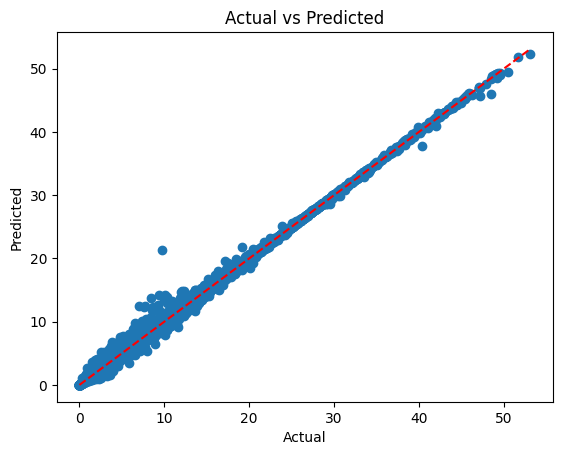

In [61]:

y_pred = rfr.predict(x_test_scaled)
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Actual vs Predicted")
plt.show()